## Gambler’s Problem
Implementing value iteration for the gambler’s problem and solving it for $ph = 0.25$ and $ph = 0.55$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
class Gambler:
    def __init__(self, p, theta = 1e-10):
        self.V = np.zeros(101)
        self.policy = np.zeros(101).astype(int)
        
        Delta = theta
        counter = 1
        
        V_temp = self.V.copy()
        V_temp[100] = 1
        plt.plot(V_temp, label = 'Sweep 0')
        
        while Delta >= theta:
            Delta = 0
            
            for s in range(1,100):            
                v = self.V[s]
                b = min(s, 100 - s) 
                W = np.zeros(b)
                for a in range(1, b+1):
                    
                    W[a-1] = p * (R(s+a) + self.V[s+a]) + (1-p) * self.V[s-a] 
                self.V[s] = np.max(W)
                self.policy[s] = np.min(
                    np.where(W >= np.max(W) - 1e-10)[0] + 1)
                
                Delta = max(Delta, np.abs(v - self.V[s]))
            
            if counter in [1, 2, 3, 15]:
                V_temp = self.V.copy()
                V_temp[100] = 1
                plt.plot(V_temp, label = 'Sweep '+str(counter))
            counter += 1
        
        
        V_temp = self.V.copy()
        V_temp[100] = 1
        plt.plot(V_temp, label = 'V*')
        plt.xlabel('Action')
        plt.ylabel('Value')
        plt.title('Action-Value function')
        plt.legend()
        plt.show() 
            
def R(a):
    if a == 100:
        return 1
    return 0

# Part 1: $P=0.25$

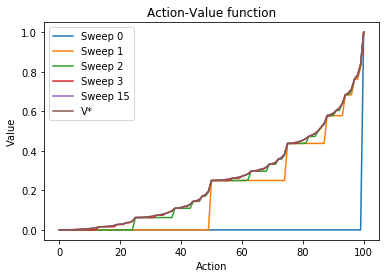

In [3]:
p = .25
model_1 = Gambler(p)

In [4]:
V = model_1.V.copy()

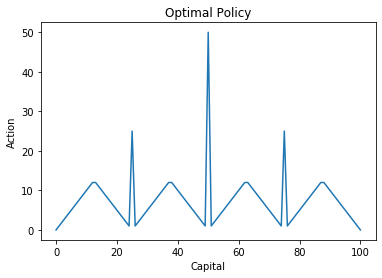

In [5]:
plt.plot(model_1.policy)
plt.xlabel('Capital')
plt.ylabel('Action')
plt.title('Optimal Policy')
#plt.legend()
plt.show()

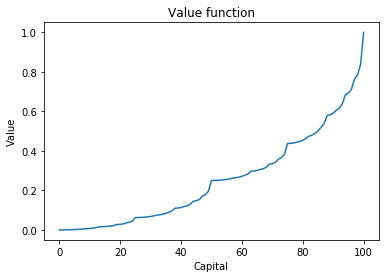

In [6]:
V[100]=1
plt.plot(V)
plt.xlabel('Capital')
plt.ylabel('Value')
plt.title('Value function')
#plt.legend()
plt.show()

## The family of all Optimal Policies: Best actions with respect to each state!
Whole family of optimal policies, all corresponding to ties for the argmax action selection with respect to the optimal value function

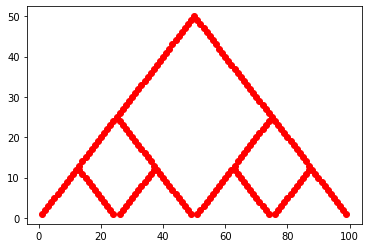

In [7]:
V = model_1.V.copy()
all_policy = []
for s in range(1,100):            
    b = min(s, 100 - s) 
    W = np.zeros(b)
    for a in range(1, b+1):
                
        W[a-1] = p * (R(s+a) + V[s+a]) + (1-p) * V[s-a]
        
    temp = np.where(W >= np.max(W) - 1e-8)[0] + 1 

    all_policy.append(([s] * len(temp), temp) )
    plt.plot([s] * len(temp), temp, 'ro')
plt.show()

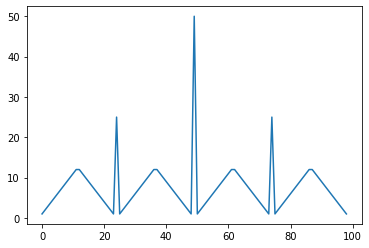

In [8]:
L = []
for x in all_policy:
    L.append(x[1].min())
plt.plot(L)
plt.show()

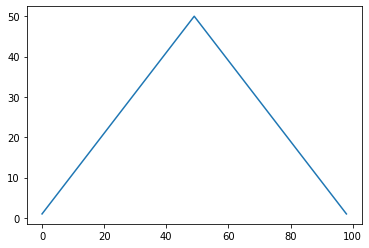

In [9]:
L= []
for x in all_policy:
    L.append(x[1].max())
plt.plot(L)
plt.show()

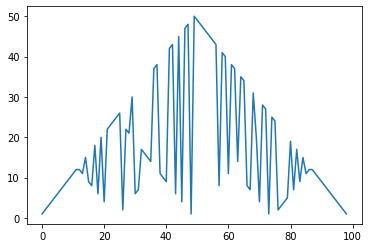

In [10]:
# Randomly choosing each action in ties for the argmax action selection with respect to the optimal value function
L= []
for x in all_policy:
    L.append(np.random.choice(x[1]))
plt.plot(L)
plt.show()

# Part 2: $p=55$

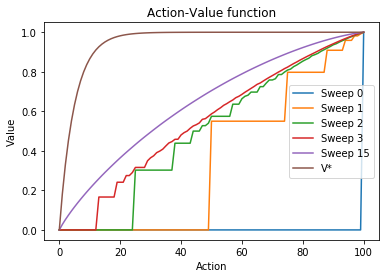

In [11]:
p = .55
model_2 = Gambler(p)

In [12]:
V = model_2.V.copy()

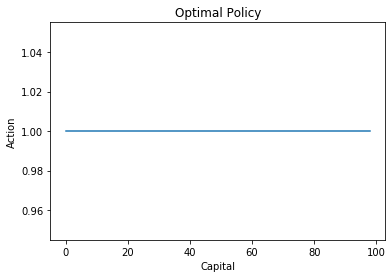

In [13]:
plt.plot(model_2.policy[1:100])
plt.xlabel('Capital')
plt.ylabel('Action')
plt.title('Optimal Policy')
#plt.legend()
plt.show()

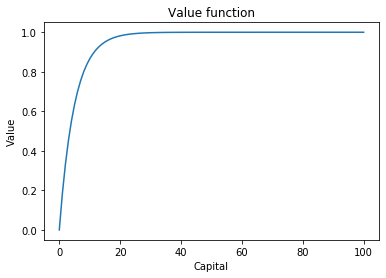

In [14]:
V[100]=1
plt.plot(V)
plt.xlabel('Capital')
plt.ylabel('Value')
plt.title('Value function')
#plt.legend()
plt.show()

## The family of all Optimal Policies: Best actions with respect to each state!
Whole family of optimal policies, all corresponding to ties for the argmax action selection with respect to the optimal value function

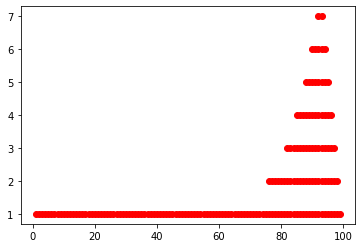

In [15]:
V = model_2.V.copy()
all_policy = []
for s in range(1,100):            
    b = min(s, 100 - s) 
    W = np.zeros(b)
    for a in range(1, b+1):
                
        W[a-1] = p * (R(s+a) + V[s+a]) + (1-p) * V[s-a]
        
    temp = np.where(W >= np.max(W) - 1e-8)[0] + 1 

    all_policy.append(([s] * len(temp), temp) )
    plt.plot([s] * len(temp), temp, 'ro')
plt.show()

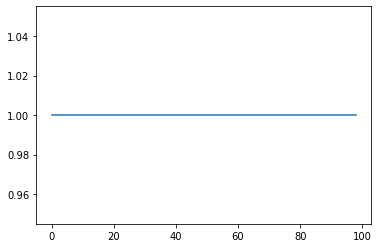

In [16]:
L = []
for x in all_policy:
    L.append(x[1].min())
plt.plot(L)
plt.show()

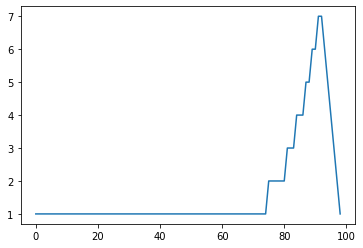

In [17]:
L= []
for x in all_policy:
    L.append(x[1].max())
plt.plot(L)
plt.show()

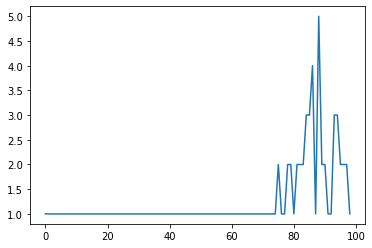

In [18]:
# Randomly choosing each action in ties for the argmax action selection with respect to the optimal value function
L= []
for x in all_policy:
    L.append(np.random.choice(x[1]))
plt.plot(L)
plt.show()